### **Problem statement** :
The objective is to observe trends and performance of each price factors with rise of COVID cases.


 ### Important information to know:

##### 1. There was a nationwide lockdown in 2020 from last week of March 2020 - May2020 (68 days) and also in the different parts of the world.

- Phase 1: 25 March 2020 – 14 April 2020 (21 days)
- Phase 2: 15 April 2020 – 3 May 2020 (19 days)
- Phase 3: 4 May 2020 – 17 May 2020 (14 days)
- Phase 4: 18 May 2020 – 31 May 2020 (14 days)

##### 2. There was a lockdown in certain states in 2021 

- April 5–15 June 2021 (71 days)

#### Lockdown paused the economic activity in the country.

### Insights needed to be drawn from the data
- Time series analysis of each feature.
- How increase in covid cases is impacting each column?
- How features are affecting each other?
- Relationship among all columns.
- Observe trends with rise of COVID cases.
- Observe the trend of the features in lockdown period.
- which feature has the best performance in the covid crisis?
- which feature has the worst performance in the covid crisis?

### Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plx
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "svg"
import datetime
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv("webscraping-covid.csv")
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)
df.head(230)

,Date,Covid cases,USD( $ ) to INR( ₹ ),crude oil ( ₹ / Barrel ),Gold Price( ₹ / Troy ounce ),Food Price Index,NIFTY_IT,NIFTY_BANK,NIFTY_50
0,2019-06-01,0,69.5795,4165.63,94373.57,61.23,16160.650391,31375.400391,11922.799805
1,2019-06-02,0,69.5795,4164.87,94347.23,76.93,16160.650391,31375.400391,11922.799805
2,2019-06-03,0,69.5781,4145.50,94387.47,78.86,16360.549805,31653.650391,12088.549805
3,2019-06-04,0,69.1697,4122.90,94367.43,100.67,16105.200195,31589.050781,12021.650391
4,2019-06-05,0,69.3155,4131.08,94354.65,110.97,16105.200195,31589.050781,12021.650391
...,...,...,...,...,...,...,...,...,...
225,2020-01-12,0,70.9577,4372.07,111345.69,120.41,15959.900391,32097.400391,12256.799805
226,2020-01-13,0,70.9614,4424.66,111311.48,67.44,16225.900391,32177.650391,12329.549805
227,2020-01-14,0,70.7271,4413.60,111310.27,95.17,16362.349609,32071.650391,12362.299805
228,2020-01-15,0,70.8542,4395.63,111313.87,124.16,16346.849609,31824.900391,12343.299805


In [4]:
df["Date"] = pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          792 non-null    datetime64[ns]
 1   Covid cases                   792 non-null    int64         
 2   USD( $ ) to INR( ₹ )          792 non-null    float64       
 3   crude oil ( ₹ / Barrel )      792 non-null    float64       
 4   Gold Price( ₹ / Troy ounce )  792 non-null    float64       
 5   Food Price Index              792 non-null    float64       
 6   NIFTY_IT                      792 non-null    float64       
 7   NIFTY_BANK                    792 non-null    float64       
 8   NIFTY_50                      792 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 55.8 KB


In [5]:
df.describe()

,Covid cases,USD( $ ) to INR( ₹ ),crude oil ( ₹ / Barrel ),Gold Price( ₹ / Troy ounce ),Food Price Index,NIFTY_IT,NIFTY_BANK,NIFTY_50
count,7.920000e+02,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,6.441124e+06,73.010317,3823.827689,124118.589634,99.607588,19300.836021,28481.146290,12289.209025
std,9.208693e+06,1.944990,923.148785,15062.259128,20.617920,5136.338964,5190.891218,1956.917702
min,0.000000e+00,68.374000,1582.870000,94340.280000,55.740000,11179.599609,16917.650391,7610.250000
25%,0.000000e+00,71.475300,3140.292500,107753.215000,85.002500,15365.349609,23168.799805,11109.650391
50%,5.761665e+05,73.246200,4086.700000,129852.210000,100.090000,16473.575195,30278.900391,11901.500000
75%,1.051599e+07,74.531075,4414.752500,136490.717500,113.237500,24885.011719,32093.650391,14249.475342
max,3.161280e+07,76.970000,5488.730000,147030.910000,152.780000,30480.050781,37306.250000,15924.200195


## Time series analysis of each feature

### Rise of Covid cases with time

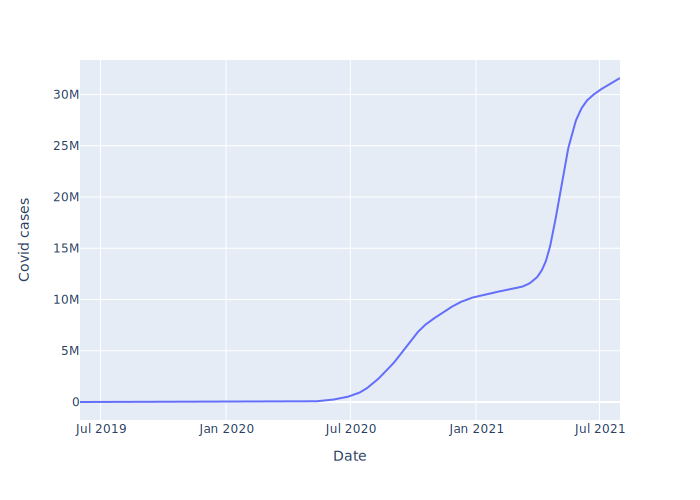

In [36]:
fig = px.line(df, x='Date',y ="Covid cases")

fig.show()

### Observation:
we can observe the covid cases started steadily rising from **july 2020**  and  started exponentially increasing from **april 2021**.

### USD-INR trend with time

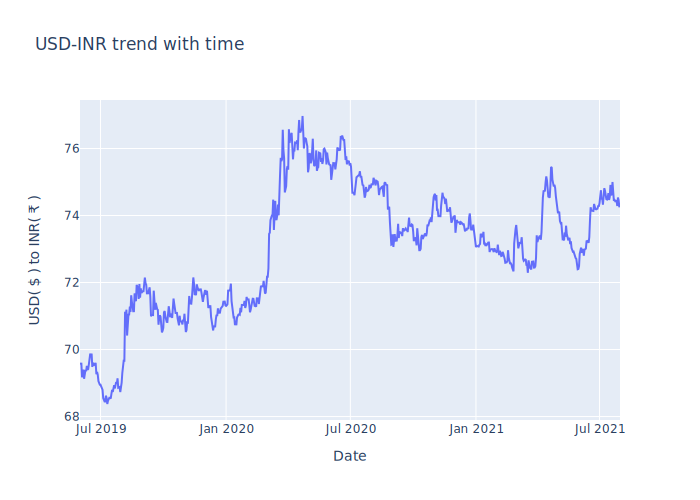

In [7]:
fig = px.line(df,x='Date', y="USD( $ ) to INR( ₹ )", title="USD-INR trend with time")
fig.show()


### Observation:
-  we can see **from the end of Febraury 2020** rupee is going up and stayed there until **August 2020 (6 months Approx.)**, **there is a nationwide lockdown in this period.
- Increase of the rupee with respect to dollar indicates **rupee is weakening against dollar**
- Also there is a spike in rupee from **mid Febraury 2021, there is a lockdown in few states in this period**.

### Crude oil price trend with time

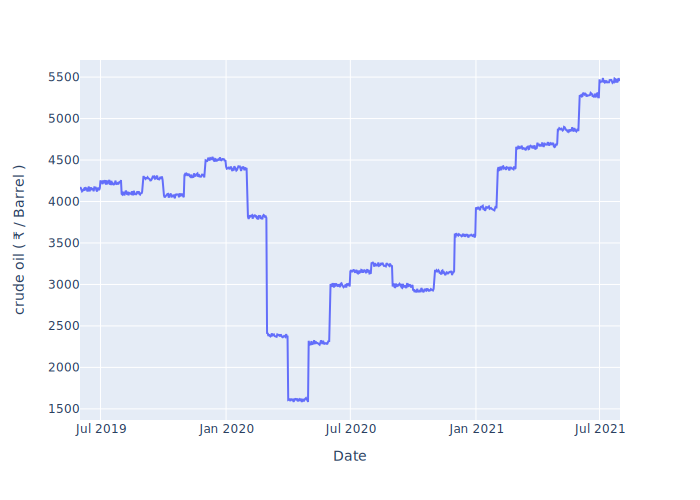

In [38]:
fig = px.line(df, x='Date',y ="crude oil ( ₹ / Barrel )")

fig.show()

### Observations:
- From **Febraury 2020 to May 2020 (4 months Approx.)** there is a steep decrease in crude oil prices.
- It because of a **decrease in imports and exports of crude oil in different parts of the world.**
- Also there is a **decrease in internal demand because of the lockdown.** 

### Gold price trend with time


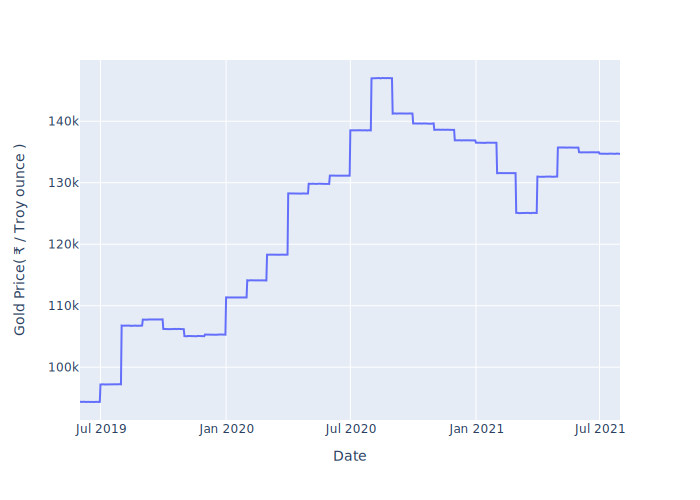

In [9]:
fig = px.line(df,x='Date', y="Gold Price( ₹ / Troy ounce )")
fig.show()

### Observations
- There is an increase in gold price from **January 2020 to January 2021 (12 months)** and there is a slight dip after that.

### Food price Index trend with time

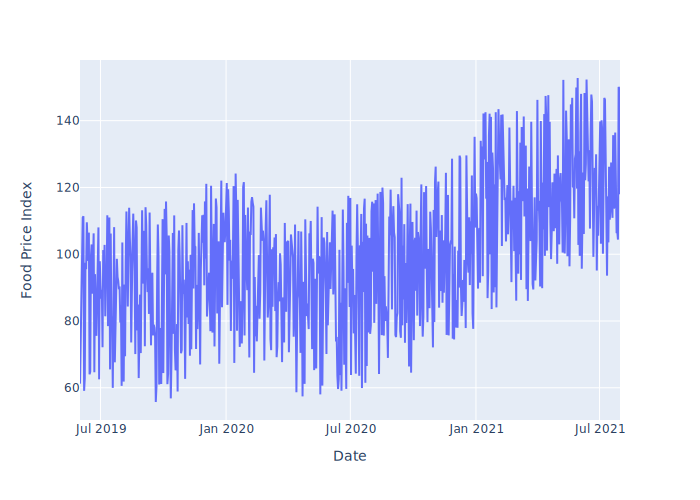

In [10]:
fig = px.line(df, x='Date',y ="Food Price Index")

fig.show()

### Observations
- Food price index seems volatile and steady.
- There is an increase in the trend **from mid May 2020**, food prices started increasing.

### NIFTY_IT

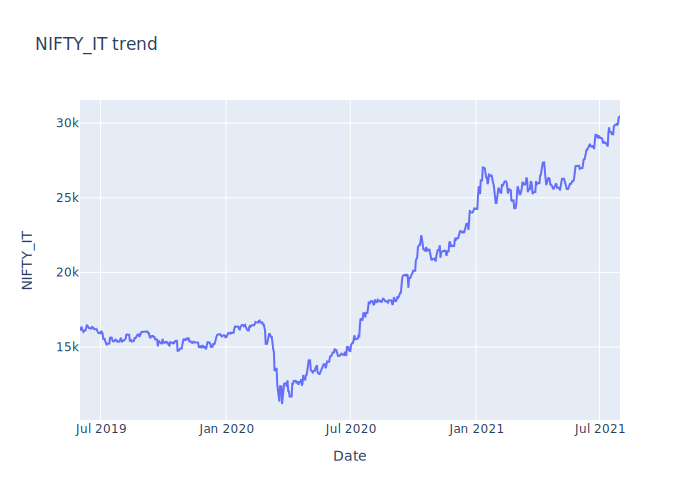

In [40]:
fig = px.line(df,x='Date', y="NIFTY_IT",title="NIFTY_IT trend")
fig.show()

### Observations
- There is a downward trend from **febraury till mid July 2020 (5 months Approx.)**
- There is a positive trend from there, better than pre-covid period. 

### NIFTY_BANK trend

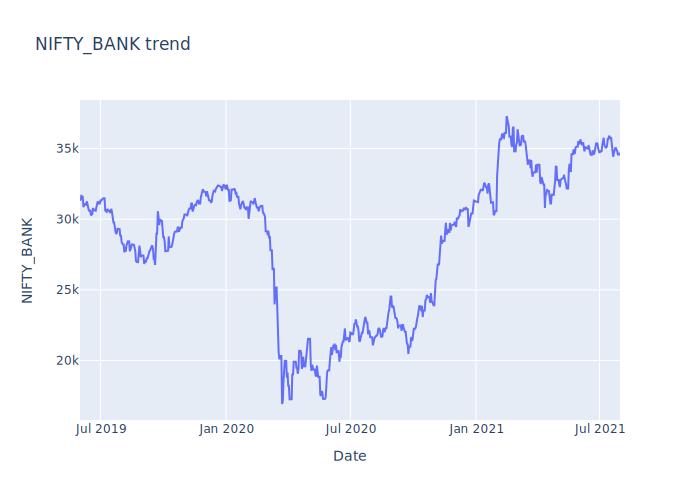

In [42]:
fig = px.line(df,x='Date', y="NIFTY_BANK",title="NIFTY_BANK trend")
fig.show()

### Observations
- There is a negative trend from mid **febraury 2020 to febraury 2021 (12 months)**

### NIFTY_50 trend

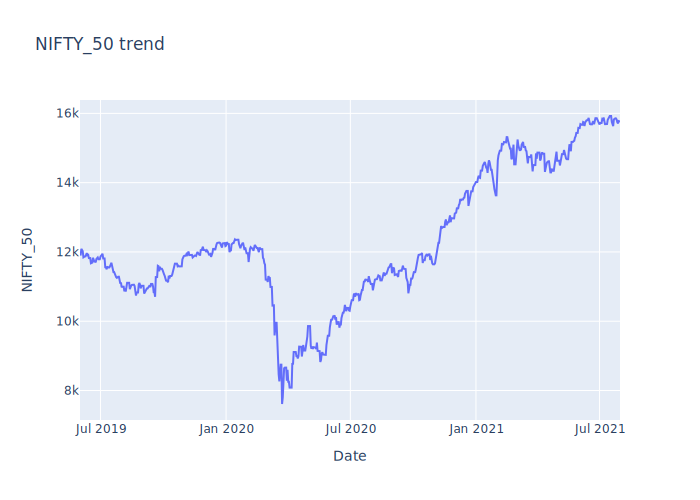

In [43]:
fig = px.line(df,x='Date', y="NIFTY_50",title="NIFTY_50 trend")
fig.show()

### Observations
- There is a negative trend from **mid Febraury 2020 to mid November 2020 (10 months Approx.)**

### Visualising the correlation among all features with pairplot

<Figure size 7200x4800 with 0 Axes>

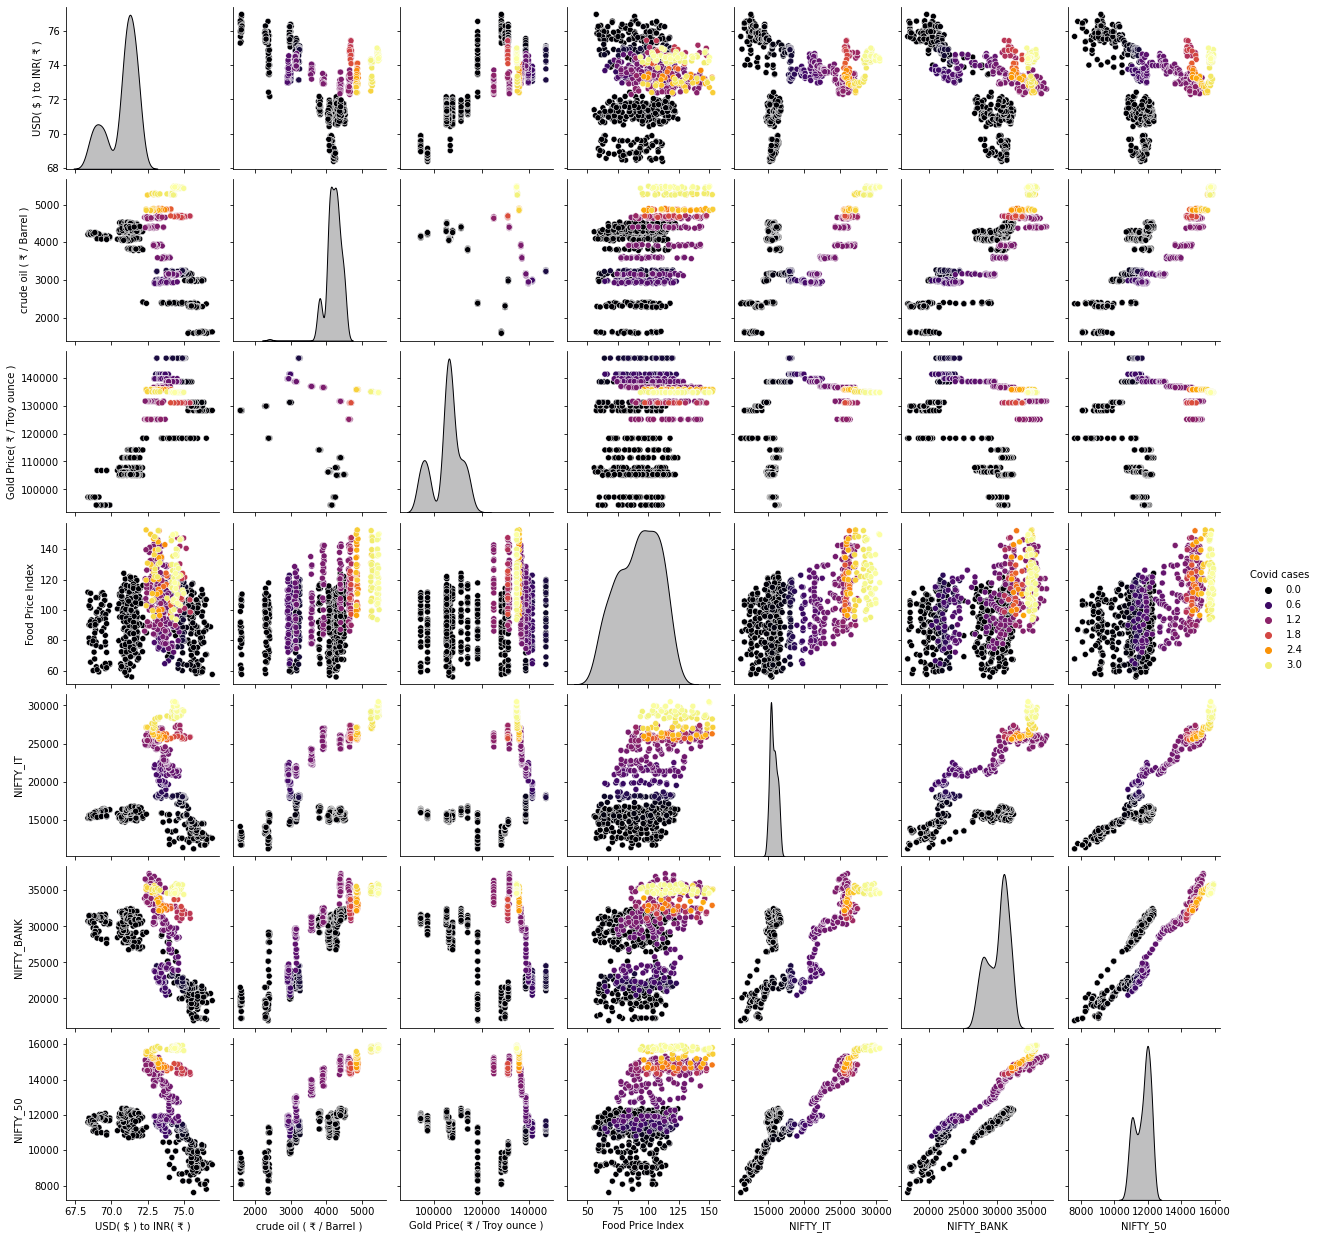

In [14]:
plt.figure(dpi = 1200)
#sns.pairplot(tips_df);
sns.pairplot(df, hue = 'Covid cases',palette="inferno");


### Checking the correlation between the features

In [15]:
corr = df.corr(method ='pearson')
corr.style.background_gradient(cmap='coolwarm')

,Covid cases,USD( $ ) to INR( ₹ ),crude oil ( ₹ / Barrel ),Gold Price( ₹ / Troy ounce ),Food Price Index,NIFTY_IT,NIFTY_BANK,NIFTY_50
Covid cases,1.000000,0.254634,0.573563,0.495994,0.539452,0.906962,0.552238,0.833842
USD( $ ) to INR( ₹ ),0.254634,1.000000,-0.491031,0.791425,0.106419,0.158987,-0.501810,-0.113410
crude oil ( ₹ / Barrel ),0.573563,-0.491031,1.000000,-0.247707,0.378906,0.596381,0.888279,0.797342
Gold Price( ₹ / Troy ounce ),0.495994,0.791425,-0.247707,1.000000,0.275373,0.523454,-0.233546,0.255578
Food Price Index,0.539452,0.106419,0.378906,0.275373,1.000000,0.567043,0.412274,0.551641
NIFTY_IT,0.906962,0.158987,0.596381,0.523454,0.567043,1.000000,0.645296,0.932253
NIFTY_BANK,0.552238,-0.501810,0.888279,-0.233546,0.412274,0.645296,1.000000,0.864326
NIFTY_50,0.833842,-0.113410,0.797342,0.255578,0.551641,0.932253,0.864326,1.000000


 #### ***Condition for correlation***, if correlation >=  ± 0.50 then the two features are strongly correlated with each other.

### Observations
**Features which have strong correlation with maximum number of other features**
- **Covid cases**  - All features are higly correlated with covid cases except dollar to rupee value.
- **NIFTY_IT** - All except dollar to rupee value.
- **Crude oil price** - All three Nifty indices and covid cases. 
- **NIFTY_50** - All except gold and dollar to rupee value.
- **NIFTY_BANK** - crude oil ( ₹ / Barrel ), NIFTY_50, NIFTY_IT, Covid cases, Dollar to rupee value (negative)
- **USD to rupee value** - Gold is positively and Nifty_bank is negatively correlated with USD to rupee value.
- **Gold** - Dollar to rupee value, NIFTY_IT, Covid cases
- **FPI** -NIFTY_IT, NIFTY_50, Covid cases

**Conclusion:** 
- All features have correlation with minimum 3 other features.
- Rupee value and Nifty_IT are negatively correlated.
- Covid cases feature  is strongly influencing with almost all features.
                      
                   

### Comparing all Features with same axis time (Date)

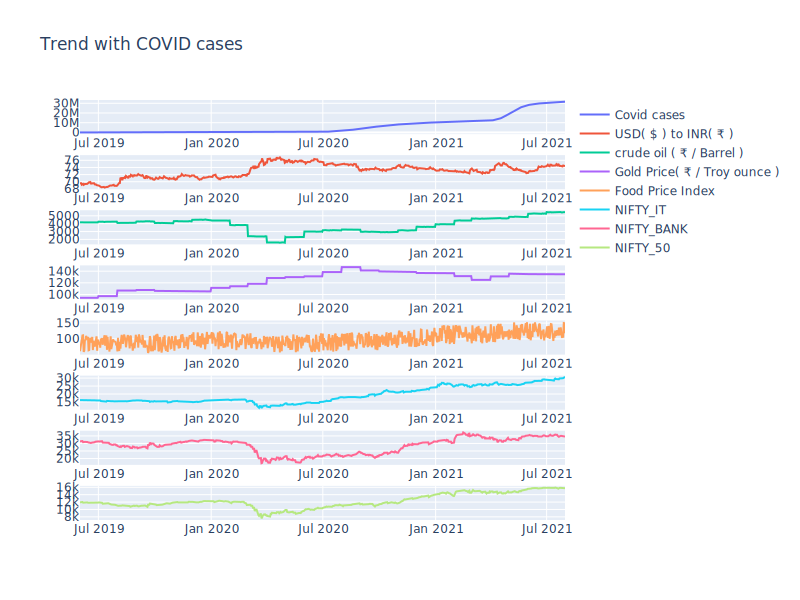

In [16]:
fig = make_subplots(rows=8, cols=1,vertical_spacing=0.05)
fig.add_trace(
    go.Scatter(x=df.reset_index()['Date'], y=df.reset_index()['Covid cases'],name='Covid cases'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=df.reset_index()['Date'], y=df.reset_index()['USD( $ ) to INR( ₹ )'],name='USD( $ ) to INR( ₹ )'),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=df.reset_index()['Date'], y=df.reset_index()['crude oil ( ₹ / Barrel )'],name='crude oil ( ₹ / Barrel )'),
    row=3, col=1
)
fig.add_trace(
    go.Scatter(x=df.reset_index()['Date'], y=df.reset_index()['Gold Price( ₹ / Troy ounce )'],name='Gold Price( ₹ / Troy ounce )'),
    row=4, col=1
)
fig.add_trace(
    go.Scatter(x=df.reset_index()['Date'], y=df.reset_index()['Food Price Index'],name='Food Price Index'),
    row=5, col=1
)
fig.add_trace(
    go.Scatter(x=df.reset_index()['Date'], y=df.reset_index()['NIFTY_IT'],name='NIFTY_IT'),
    row=6, col=1
)
fig.add_trace(
    go.Scatter(x=df.reset_index()['Date'], y=df.reset_index()['NIFTY_BANK'],name='NIFTY_BANK'),
    row=7, col=1
)
fig.add_trace(
    go.Scatter(x=df.reset_index()['Date'], y=df.reset_index()['NIFTY_50'],name='NIFTY_50'),
    row=8, col=1
)
fig.update_layout(height=600, width=800, title_text="Trend with COVID cases")
fig.show()

### Conclusions

### Insights from the time series of all features on same axis, when covid cases started rising:

**Features that showed best performance:**
   
**During the crisis**
  
  - ***Gold price*** is the only feature that performed better during the crisis.
  
**After the crisis**
   
  
  - ***NIFTY_50, IT & BANK*** decreased in the period of lockdown but performed better than pre covid period after the lockdown.  
        
**Features that showed worst performance:**
  1. ***Rupee*** value decreased.
  2. ***Crude oil prices*** decreased.
  3. ***Food prices*** increased.

- Gold was the safter investment option during such crisis.